# Predict Customer Personality To Boost Marketing Campaign

Author : Theofilus Arifin


---

# Introduction

**Table of Content**:

- Introduction
- Load Dataset
- Data Cleaning
- Feature Engineering
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Evaluation
- Business Recomendation

**Background**

Perkembangan cepat suatu perusahaan dapat dicapai dengan memahami perilaku personalitas pelanggannya. Hal ini memungkinkan perusahaan untuk menyediakan layanan dan manfaat yang lebih baik kepada pelanggan potensial yang cenderung setia. Dengan menganalisis data kampanye pemasaran masa lalu, perusahaan dapat meningkatkan kinerja dan mengarahkan upaya kepada pelanggan yang tepat untuk melakukan transaksi di platform mereka. Fokusnya adalah mengembangkan model prediksi kelompok, yang akan membantu perusahaan dalam pengambilan keputusan.



**Goals**

Meningkatkan konversi kampanye pemasaran dengan pemahaman yang lebih mendalam tentang perilaku pelanggan.

**Objective**

- **Analisis Konversi**: Menganalisis data historis kampanye pemasaran untuk memahami faktor-faktor yang memengaruhi konversi pelanggan. Identifikasi pola perilaku dan preferensi yang dapat digunakan untuk merancang strategi kampanye yang lebih efektif.

- **Persiapan Data**: Membersihkan, menyiapkan, dan mengelola data kampanye pemasaran sebelumnya untuk memastikan keakuratan dan ketersediaan data yang diperlukan. Melakukan pre-processing untuk mempersiapkan data agar siap digunakan dalam analisis.

- **Pembangunan Model**: Mengembangkan model machine learning untuk memprediksi perilaku pelanggan berdasarkan data historis. Melatih dan mengevaluasi model untuk memastikan keakuratannya dalam memprediksi preferensi pelanggan dan mendukung pengambilan keputusan kampanye yang lebih baik.

**Business Matric**

Conversion Rate

# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
!git clone https://github.com/Theofilusarifin/Predict-Customer-Personality-To-Boost-Marketing-Campaign-By-Using-Machine-Learning

Cloning into 'Predict-Customer-Personality-To-Boost-Marketing-Campaign-By-Using-Machine-Learning'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 71.30 KiB | 11.88 MiB/s, done.


## Read Dataset


---



In [3]:
df = pd.read_csv('/content/Predict-Customer-Personality-To-Boost-Marketing-Campaign-By-Using-Machine-Learning/dataset.csv')
df.shape

(2240, 30)

In [4]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1604,1604,11092,1961,S1,Menikah,27116000.0,1,1,02-03-2014,78,...,7,0,0,0,0,0,0,3,11,0
1815,1815,2549,1983,S3,Bertunangan,21840000.0,1,0,21-07-2013,80,...,9,0,0,0,0,0,0,3,11,0
892,892,10925,1983,S1,Menikah,76630000.0,0,0,14-01-2014,93,...,1,0,0,0,0,0,0,3,11,0
817,817,7462,1954,S1,Lajang,22507000.0,0,0,24-11-2012,67,...,9,0,0,0,0,0,0,3,11,0
1327,1327,839,1975,S3,Menikah,45503000.0,1,0,25-09-2013,54,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Dataset Overview


---



| Fitur                | Deskripsi                                                                                                                                                                   |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `ID`                 | Identifier unik untuk setiap rekaman.                                                                                                                                       |
| `Year_Birth`         | Tahun kelahiran pelanggan.                                                                                                                                                  |
| `Education`          | Tingkat pendidikan pelanggan (misalnya, SMA, sarjana, magister).                                                                                                            |
| `Marital_Status`     | Status perkawinan pelanggan (misalnya, single, menikah, bercerai).                                                                                                          |
| `Income`             | Pendapatan tahunan pelanggan.                                                                                                                                               |
| `Kidhome`            | Jumlah anak-anak kecil di rumah pelanggan.                                                                                                                                  |
| `Teenhome`           | Jumlah remaja di rumah pelanggan.                                                                                                                                           |
| `Dt_Customer`        | Tanggal pendaftaran atau menjadi pelanggan.                                                                                                                                  |
| `Recency`            | Jumlah hari sejak pembelian terakhir pelanggan.                                                                                                                             |
| `MntCoke`            | Jumlah yang dihabiskan oleh pelanggan untuk produk Coca-Cola.                                                                                                                |
| `MntFruits`          | Jumlah yang dihabiskan oleh pelanggan untuk buah-buahan.                                                                                                                     |
| `MntMeatProducts`    | Jumlah yang dihabiskan oleh pelanggan untuk produk daging.                                                                                                                   |
| `MntFishProducts`    | Jumlah yang dihabiskan oleh pelanggan untuk produk ikan.                                                                                                                     |
| `MntSweetProducts`   | Jumlah yang dihabiskan oleh pelanggan untuk produk manis.                                                                                                                    |
| `MntGoldProds`       | Jumlah yang dihabiskan oleh pelanggan untuk produk emas.                                                                                                                     |
| `NumDealsPurchases`  | Jumlah pembelian yang dilakukan dengan diskon atau penawaran.                                                                                                                |
| `NumWebPurchases`    | Jumlah pembelian yang dilakukan melalui web.                                                                                                                                 |
| `NumCatalogPurchases`| Jumlah pembelian yang dilakukan melalui katalog.                                                                                                                             |
| `NumStorePurchases`  | Jumlah pembelian yang dilakukan di toko.                                                                                                                                     |
| `NumWebVisitsMonth`  | Jumlah kunjungan ke situs web per bulan.                                                                                                                                    |
| `AcceptedCmp3`       | Apakah pelanggan menerima kampanye pemasaran 3 (1 jika diterima, 0 sebaliknya).                                                                                             |
| `AcceptedCmp4`       | Apakah pelanggan menerima kampanye pemasaran 4 (1 jika diterima, 0 sebaliknya).                                                                                             |
| `AcceptedCmp5`       | Apakah pelanggan menerima kampanye pemasaran 5 (1 jika diterima, 0 sebaliknya).                                                                                             |
| `AcceptedCmp1`       | Apakah pelanggan menerima kampanye pemasaran 1 (1 jika diterima, 0 sebaliknya).                                                                                             |
| `AcceptedCmp2`       | Apakah pelanggan menerima kampanye pemasaran 2 (1 jika diterima, 0 sebaliknya).                                                                                             |
| `Complain`           | Apakah pelanggan pernah mengeluh (1 jika mengeluh, 0 sebaliknya).                                                                                                           |
| `Z_CostContact`      | Biaya tetap yang terkait dengan menghubungi pelanggan.                                                                                                                       |
| `Z_Revenue`          | Pendapatan tetap yang terkait dengan menghubungi pelanggan.                                                                                                                  |
| `Response`           | Tanggapan pelanggan terhadap kampanye pemasaran (1 jika merespon, 0 sebaliknya).                                                                                            |

In [7]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index

print("Jumlah fitur numerik:", len(numerical_feats))
print("Jumlah fitur kategorikal:", len(categorical_feats))

Jumlah fitur numerik: 26
Jumlah fitur kategorikal: 3


In [8]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,ID,int64,0,0.00,2240,"[5524, 2174, 4141, 6182, 5324]"
1,Year_Birth,int64,0,0.00,59,"[1957, 1954, 1965, 1984, 1981]"
2,Education,object,0,0.00,5,"[S1, S3, S2, SMA, D3]"
3,Marital_Status,object,0,0.00,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
4,Income,float64,24,1.07,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
5,Kidhome,int64,0,0.00,3,"[0, 1, 2]"
6,Teenhome,int64,0,0.00,3,"[0, 1, 2]"
7,Dt_Customer,object,0,0.00,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,0,0.00,100,"[58, 38, 26, 94, 16]"
9,MntCoke,int64,0,0.00,776,"[635000, 11000, 426000, 173000, 520000]"


In [9]:
df.duplicated().sum()

0

**Key Takeaways** :

- Dataset memeiliki 2240 records dan 29 fitur
- 26 fitur bertipe numerik dan 3 fitur bertipe kategorikal
- Tipe data pada feature yang ada berupa: object, float64, int64
- Terdapat 1 fitur yang memiliki missing value yaitu `Income`
- Tidak ada data duplikat

# Data Cleaning

In [10]:
df1 = df.copy()

## Handling Missing Value


---



Handling missing value dilakukan dengan melakukan imputasi nilai menggunakan nilai median.

In [11]:
df1.fillna(df1['Income'].median(), inplace=True)

In [12]:
df1.isna().sum().sum()

0

## Handling Outlier


---



In [13]:
def calculate_outliers(column):
  # Calculate the IQR
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter the column to count outliers
  outliers = column[(column < lower_bound) | (column > upper_bound)]

  # Calculate percentage of outliers
  percentage_outliers = (outliers.shape[0] / column.shape[0]) * 100

  return outliers.shape[0], percentage_outliers

Hanya fitur yang memiliki nilai outlier di bawah 5% yang akan dihapus, mengingat dataset yang relatif kecil sehingga penghapusan data tidak akan signifikan.

In [14]:
outliers_info = []

for feature in numerical_feats:
  num_outliers, percentage_outliers = calculate_outliers(df1[feature])

  if percentage_outliers < 5:
    outliers_info.append({
        'feature': feature,
        'outlier_count': num_outliers,
        'percentage_outliers': percentage_outliers
    })

outliers_df = pd.DataFrame(outliers_info).sort_values(by='percentage_outliers', ascending=True)
outliers_df = outliers_df[
    (outliers_df['percentage_outliers'] > 0.00) &
    (outliers_df['feature'] != 'Response')
    ]
outliers_df

,feature,outlier_count,percentage_outliers
1,Year_Birth,3,0.133929
8,NumWebPurchases,4,0.178571
2,Income,8,0.357143
11,NumWebVisitsMonth,8,0.357143
13,Complain,21,0.937500
9,NumCatalogPurchases,23,1.026786
12,AcceptedCmp2,30,1.339286
6,MntCoke,35,1.562500
7,NumDealsPurchases,86,3.839286


In [15]:
def remove_outliers_iqr(dataframe, column_name):
    # Calculate the IQR
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    filtered_dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

    # Display information about the removed outliers
    outliers_removed = dataframe.shape[0] - filtered_dataframe.shape[0]
    print(f"Number of outliers removed in '{column_name}': {outliers_removed}")

    return filtered_dataframe

In [16]:
for feature in outliers_df['feature'].tolist():
  df1 = remove_outliers_iqr(df1, feature)

Number of outliers removed in 'Year_Birth': 3
Number of outliers removed in 'NumWebPurchases': 4
Number of outliers removed in 'Income': 8
Number of outliers removed in 'NumWebVisitsMonth': 8
Number of outliers removed in 'Complain': 20
Number of outliers removed in 'NumCatalogPurchases': 20
Number of outliers removed in 'AcceptedCmp2': 30
Number of outliers removed in 'MntCoke': 34
Number of outliers removed in 'NumDealsPurchases': 76


In [17]:
print("Total data sebelum removing outlier", df.shape[0])
print("Total data setelah removing outlier", df1.shape[0])
print("-" * 50)
print("Total outlier yang dihapus", df.shape[0] - df1.shape[0])

Total data sebelum removing outlier 2240
Total data setelah removing outlier 2037
--------------------------------------------------
Total outlier yang dihapus 203


**Key Takeaways** :

- Terdapat 24 missing value pada fiture `income` yang diimputasi menggunakan nilai median
- Terdapat 203 data outlier (9%) yang dihapus dari dataset

# Feature Engineering

In [18]:
df_clean = df1.copy()

## Customer Age


---



Melakukan ekstraksi umur pelanggan dari fitur `Year_Birth`

In [19]:
# Mengubah tipe data menjadi datetime
df_clean['Dt_Customer'] =  pd.to_datetime(df1['Dt_Customer'])

# Membuat fitur baru yaitu customer_age
df_clean['Age'] = 2024 - df_clean['Year_Birth']

In [20]:
print(f'min age: {df_clean.Age.min()}')
print(f'max age: {df_clean.Age.max()}')

min age: 28
max age: 84


## Age Group

---



Pembagian age group akan dilakukan berdasarkan data dari https://www.statcan.gc.ca/en/concepts/definitions/age2

In [21]:
def categorize_age(age):
    if age <= 14:
        return 'children'
    elif age <= 24:
        return 'youth'
    elif age <= 44:
        return 'young adults'
    elif age <= 64:
        return 'middle-aged adults'
    elif age >= 65:
        return 'seniors'

In [22]:
df_clean['Age_Group'] = df_clean.apply(lambda row: categorize_age(row['Age']), axis=1)

In [23]:
df_clean['Age_Group'].value_counts()

middle-aged adults    1141
seniors                499
young adults           397
Name: Age_Group, dtype: int64

## First Purchase Age

---



`First Purchase Age` merepresentasikan umur customer saat pertama kali mendaftar sebagai pelanggan

In [24]:
df_clean['First_Purchase_Age'] = df_clean['Dt_Customer'].dt.year - df_clean['Year_Birth']

In [25]:
print(f'min age: {df_clean.First_Purchase_Age.min()}')
print(f'max age: {df_clean.First_Purchase_Age.max()}')

min age: 16
max age: 73


## Total Children

---



Fitur ini merepresentasikan jumlah anak yang dimiliki oleh pelanggan



In [26]:
df_clean['Total_Children'] = df_clean['Kidhome'] + df_clean['Teenhome']

In [27]:
df_clean['Total_Children'].value_counts()

1    1066
0     571
2     362
3      38
Name: Total_Children, dtype: int64

## Membership Duration


---



Fitur ini merepresentasikan berapa tahun customer telah menjadi pelanggan

In [28]:
df_clean['Membership_Duration'] = 2024 - df_clean['Dt_Customer'].dt.year

In [29]:
df_clean['Membership_Duration'].value_counts()

11    1078
10     523
12     436
Name: Membership_Duration, dtype: int64

## Total Transaction

---



Merepresentasikan jumlah total transaksi yang dilakukan oleh pelanggan, dihitung dengan menjumlahkan jumlah pembelian paket, pembelian web, pembelian katalog, dan pembelian di toko.

In [30]:
df_clean['Total_Transaction'] = df_clean['NumDealsPurchases'] + df_clean['NumWebPurchases'] + df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

## Total Spending

---



Menunjukkan total pengeluaran oleh pelanggan di berbagai kategori produk, dihitung dengan menjumlahkan pengeluaran pada Coke, buah-buahan, produk daging, produk ikan, produk manis, dan produk emas.

In [31]:
df_clean['Total_Spending'] = df_clean['MntCoke'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds']

## Total Accepted Campaign

---



Mencerminkan total jumlah kampanye pemasaran yang diterima oleh pelanggan, dihitung dengan menjumlahkan nilai biner yang menunjukkan penerimaan terhadap masing-masing dari lima kampanye pemasaran (AcceptedCmp1 hingga AcceptedCmp5).

In [32]:
df_clean['Total_Accepted_Campaign'] = df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [33]:
df_clean['Total_Accepted_Campaign'].value_counts()

0    1653
1     300
2      57
3      27
Name: Total_Accepted_Campaign, dtype: int64

## Conversion Rate


---



Fitur `Conversion_Rate` menggambarkan tingkat konversi dari response dibandingkan dengan jumlah kunjungan bulanan ke situs web.

In [34]:
def calculate_conversion_rate(x,y):
    if y == 0:
        return 0
    return x / y

df_clean['Conversion_Rate'] = round(df_clean.apply(lambda row: calculate_conversion_rate(row['Response'], row['NumWebVisitsMonth']), axis=1), 2)

In [35]:
# Lowest conversion rate
lowest_conversion_rate = df_clean['Conversion_Rate'].min()
lowest_conversion_rate_count = df_clean[df_clean['Conversion_Rate'] == lowest_conversion_rate].shape[0]
print("Lowest conversion rate:", lowest_conversion_rate, "total data:", lowest_conversion_rate_count)

# Highest conversion rate
highest_conversion_rate = df_clean['Conversion_Rate'].max()
highest_conversion_rate_count = df_clean[df_clean['Conversion_Rate'] == highest_conversion_rate].shape[0]
print("Highest conversion rate:", highest_conversion_rate, "total data:", highest_conversion_rate_count)

Lowest conversion rate: 0.0 total data: 1767
Highest conversion rate: 1.0 total data: 25


In [36]:
# Menaruh Response pada kolom terakhir sebagai target
response = df_clean.pop('Response')
df_clean['Response'] = response

df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Age,Age_Group,First_Purchase_Age,Total_Children,Membership_Duration,Total_Transaction,Total_Spending,Total_Accepted_Campaign,Conversion_Rate,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,...,67,seniors,55,0,12,25,1617000,0,0.14,1
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,...,70,seniors,60,2,10,6,27000,0,0.00,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,59,middle-aged adults,48,0,11,21,776000,0,0.00,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,...,40,young adults,30,1,10,8,53000,0,0.00,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,43,young adults,33,1,10,19,422000,0,0.00,0


# Exploratory Data Analysis

## Statistical Descriptive

---



 Proses analisis fitur numerik dan kategorikal untuk menggambarkan dan merangkum data dalam bentuk statistik guna memberikan pemahaman yang lebih baik tentang distribusi dan karakteristik data.

### Numerical Feature

In [37]:
numerical_feats = df_clean.dtypes[(df_clean.dtypes == "int64") | (df_clean.dtypes == "float64")].index
categorical_feats = df_clean.dtypes[df_clean.dtypes == "object"].index

In [38]:
pd.set_option('display.max_columns', 100)
df_clean[numerical_feats].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,First_Purchase_Age,Total_Children,Membership_Duration,Total_Transaction,Total_Spending,Total_Accepted_Campaign,Conversion_Rate,Response
count,2037.000000,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2.037000e+03,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0,2037.0,2037.0,2037.0,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000
mean,5607.808051,1969.098675,5.082750e+07,0.439372,0.495336,49.093274,2.756406e+05,26241.040746,1.585911e+05,37685.321551,26850.270005,41842.906235,2.099656,3.938144,2.482081,5.725577,5.271969,0.071183,0.059401,0.056456,0.055965,0.0,0.0,3.0,11.0,54.901325,43.944035,0.934708,10.957290,14.245459,5.668513e+05,0.243004,0.038498,0.132548
std,3252.769561,11.666855,2.030625e+07,0.534545,0.539776,29.009113,3.045057e+05,39689.726449,2.151776e+05,55275.081387,40939.490859,49650.783079,1.367021,2.564321,2.632407,3.228191,2.280796,0.257194,0.236432,0.230856,0.229910,0.0,0.0,0.0,0.0,11.666855,11.705657,0.727078,0.684979,7.332922,5.797444e+05,0.565335,0.135789,0.339169
min,0.000000,1940.000000,5.305000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,28.000000,16.000000,0.000000,10.000000,1.000000,8.000000e+03,0.000000,0.000000,0.000000
25%,2815.000000,1960.000000,3.452900e+07,0.000000,0.000000,24.000000,2.200000e+04,1000.000000,1.500000e+04,3000.000000,1000.000000,8000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,46.000000,36.000000,0.000000,10.000000,7.000000,6.500000e+04,0.000000,0.000000,0.000000
50%,5493.000000,1970.000000,5.030000e+07,0.000000,0.000000,49.000000,1.560000e+05,8000.000000,5.900000e+04,12000.000000,8000.000000,23000.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,54.000000,43.000000,1.000000,11.000000,14.000000,3.180000e+05,0.000000,0.000000,0.000000
75%,8439.000000,1978.000000,6.738100e+07,1.000000,1.000000,74.000000,4.650000e+05,33000.000000,2.170000e+05,50000.000000,33000.000000,54000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,64.000000,53.000000,1.000000,11.000000,20.000000,9.900000e+05,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,1.054710e+08,2.000000,2.000000,99.000000,1.193000e+06,197000.000000,1.607000e+06,259000.000000,198000.000000,249000.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,3.0,11.0,84.000000,73.000000,3.000000,12.000000,34.000000,2.525000e+06,3.000000,1.000000,1.000000


**Key Takeaways** :

- Pelanggan rata-rata berusia sekitar 54 tahun, menunjukkan mayoritas berada di usia menengah hingga tua.

- Pendapatan rata-rata pelanggan sekitar 50 juta dengan variasi yang signifikan.

- Mayoritas pelanggan memiliki minimal 1 anak atau remaja di rumah.

- Rata-rata, pelanggan aktif melakukan sekitar 14 transaksi, menunjukkan tingkat keterlibatan yang cukup tinggi.

- Rata rata conversion rate adalah 3.8%, menunjukkan tingkat respons yang relatif rendah.






In [39]:
results = []
for col in numerical_feats:
    skewness = df_clean[col].skew()
    kurtosis = df_clean[col].kurt()

    # Determine skewness type
    if skewness > 0:
        skew_type = 'positive'
    elif skewness < 0:
        skew_type = 'negative'
    else:
        skew_type = 'no skew'
    results.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurtosis, 'Skew_Type': skew_type})

results_df = pd.DataFrame(results)
results_df = results_df.reindex(results_df['Skewness'].abs().sort_values(ascending=False).index)
results_df

,Column,Skewness,Kurtosis,Skew_Type
32,Conversion_Rate,5.160214,30.387657,positive
20,AcceptedCmp1,3.866486,12.962443,positive
19,AcceptedCmp5,3.846383,12.807236,positive
18,AcceptedCmp4,3.730732,11.930071,positive
17,AcceptedCmp3,3.337862,9.150303,positive
31,Total_Accepted_Campaign,2.670384,7.640997,positive
33,Response,2.168911,2.706829,positive
10,MntSweetProducts,2.079526,3.870748,positive
7,MntFruits,2.072567,3.871094,positive
9,MntFishProducts,1.905274,2.971120,positive


**Key Takeaways** :

- Mayoritas pelanggan cenderung memiliki tingkat konversi yang rendah, ditandai dengan skewness positif dan kurtosis yang tinggi dari data konversi rate.

- Kampanye pemasaran, termasuk Cmp1 hingga Cmp5, menunjukkan tingkat penerimaan yang rendah dari pelanggan, yang tercermin dari skewness dan kurtosis yang tinggi pada data Accepted Campaigns.

### Categorical Feature

In [40]:
df_clean[categorical_feats].describe()

,Education,Marital_Status,Age_Group
count,2037,2037,2037
unique,5,6,3
top,S1,Menikah,middle-aged adults
freq,1027,783,1141


In [41]:
top_freq_percentages = {}
top_categories = {}

for feature in categorical_feats:
    value_counts = df_clean[feature].value_counts()
    top_category = value_counts.idxmax()

    top_freq_percentage = (value_counts[top_category] / len(df_clean)) * 100
    top_freq_percentages[feature] = top_freq_percentage
    top_categories[feature] = top_category

top_freq_percentages_df = pd.DataFrame.from_dict(top_freq_percentages, orient='index', columns=['top_frequency_percentage']).sort_values('top_frequency_percentage', ascending=False)
top_categories_df = pd.DataFrame.from_dict(top_categories, orient='index', columns=['top_category'])

result_df = pd.concat([top_freq_percentages_df, top_categories_df], axis=1)
result_df


,top_frequency_percentage,top_category
Age_Group,56.013746,middle-aged adults
Education,50.417280,S1
Marital_Status,38.438881,Menikah


In [42]:
# cek unique valaue dari setiap fitur kategorikal
for feature in categorical_feats:
    print("{} have {} unique values".format(feature, df_clean[feature].nunique()))
    print("{} values: {}".format(feature, df_clean[feature].unique()))
    print('-' * 100)

Education have 5 unique values
Education values: ['S1' 'S3' 'S2' 'SMA' 'D3']
----------------------------------------------------------------------------------------------------
Marital_Status have 6 unique values
Marital_Status values: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
----------------------------------------------------------------------------------------------------
Age_Group have 3 unique values
Age_Group values: ['seniors' 'middle-aged adults' 'young adults']
----------------------------------------------------------------------------------------------------


**Key Takeaways** :

- Fitur `Education` dan `Age Group` merupakan fitur ordinal sedangkan `Marital Status` merupakan fitur nominal
- Mayoritas pelanggan memiliki tingkat pendidikan S1, mencakup lebih dari 50% dari total pelanggan.
- Kategori dewasa tengah mendominasi dengan persentase frekuensi tertinggi, menunjukkan bahwa sebagian besar pelanggan berada dalam kelompok usia ini.

## Univariate Analysis

---



### Conversion Rate

---



In [43]:
conversion_rate = df_clean['Conversion_Rate'].value_counts().sort_index()
conversion_rate

0.00    1767
0.10       1
0.11      27
0.12      48
0.14      34
0.17      36
0.20      19
0.25      22
0.33      27
0.50      31
1.00      25
Name: Conversion_Rate, dtype: int64

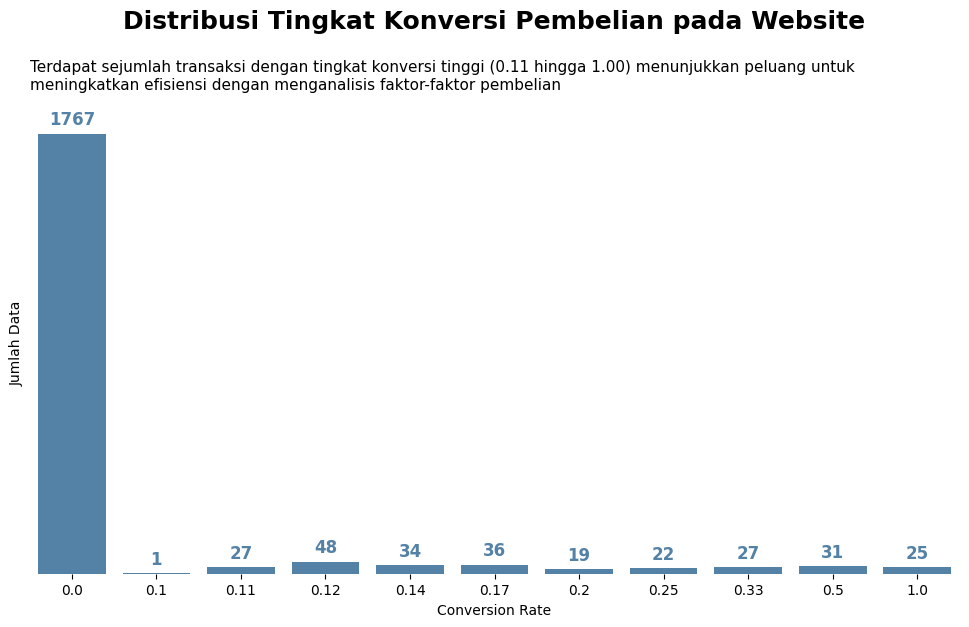

In [44]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# -----------------------------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = conversion_rate.index, y = conversion_rate.values, palette=['steelblue'])

# -----------------------------------------------------------------------------------------------------------------------------
# mengatur label
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('Jumlah Data')
plt.xlabel('Conversion Rate')

# -----------------------------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Distribusi Tingkat Konversi Pembelian pada Website', fontsize=18, pad=60, loc='center',fontweight='bold')
plt.text(y = 2000, x = -0.5,
         s = 'Terdapat sejumlah transaksi dengan tingkat konversi tinggi (0.11 hingga 1.00) menunjukkan peluang untuk \nmeningkatkan efisiensi dengan menganalisis faktor-faktor pembelian',
         ha='left', va='center', size=11)


# -----------------------------------------------------------------------------------------------------------------------------
# patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot, (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

**Key Takeaways** :

- Terdapat sejumlah transaksi dengan tingkat konversi tinggi (0.11 hingga 1.00) menunjukkan peluang untuk \nmeningkatkan efisiensi dengan menganalisis faktor-faktor pembelian

### Numerical Features

In [45]:
n_feats = ['Income', 'Recency', 'Membership_Duration', 'Age', 'First_Purchase_Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'Conversion_Rate']

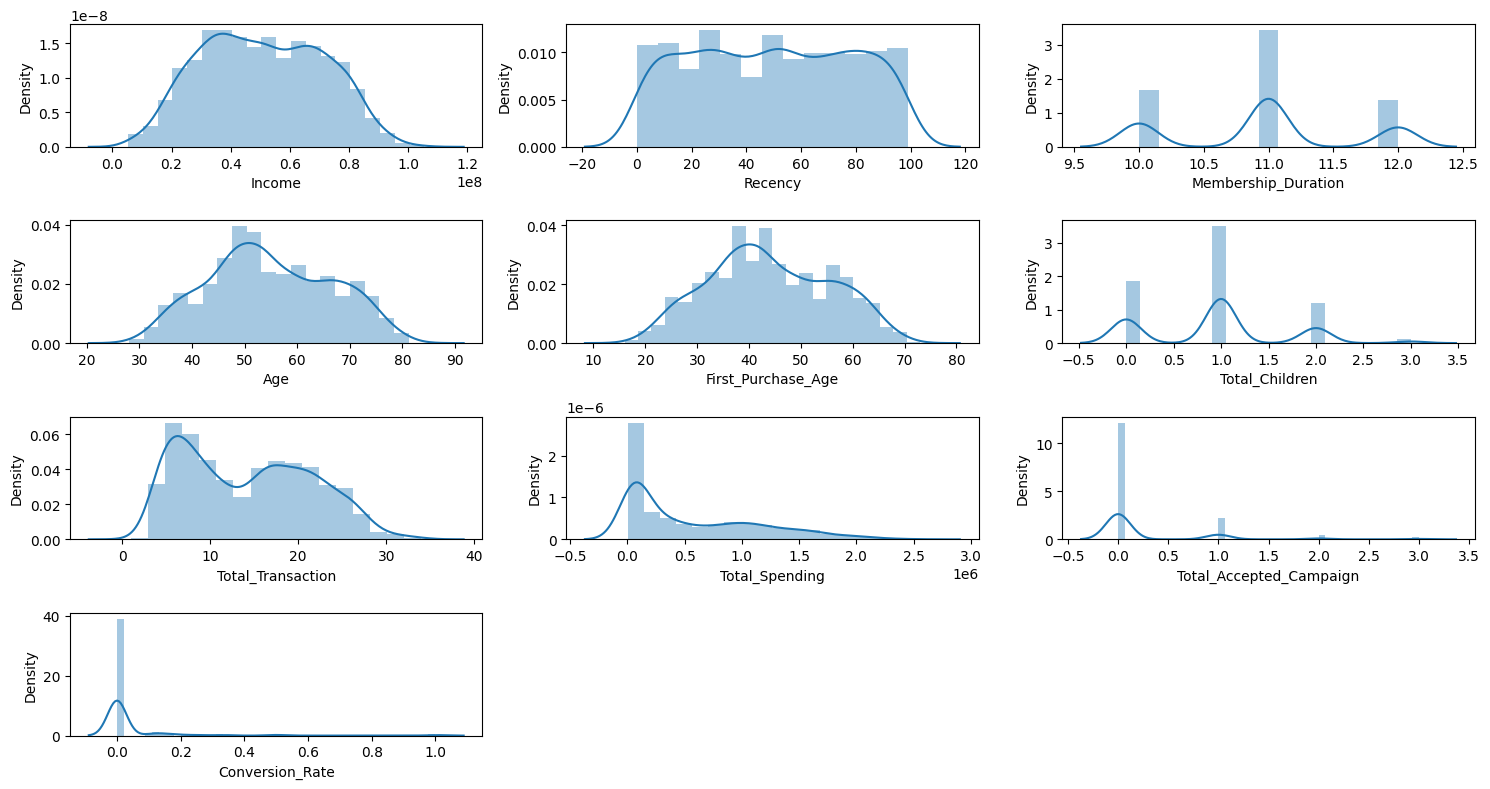

In [46]:
plt.figure(figsize=(15, 8))
for i in range(0, len(n_feats)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df_clean[n_feats[i]])
    plt.tight_layout()

**Key Takeaways** :

- Distribusi fitur `Income`, `Age`, dan `First_Purchase_Age` cenderung mendekati distribusi normal

### Categorical Features

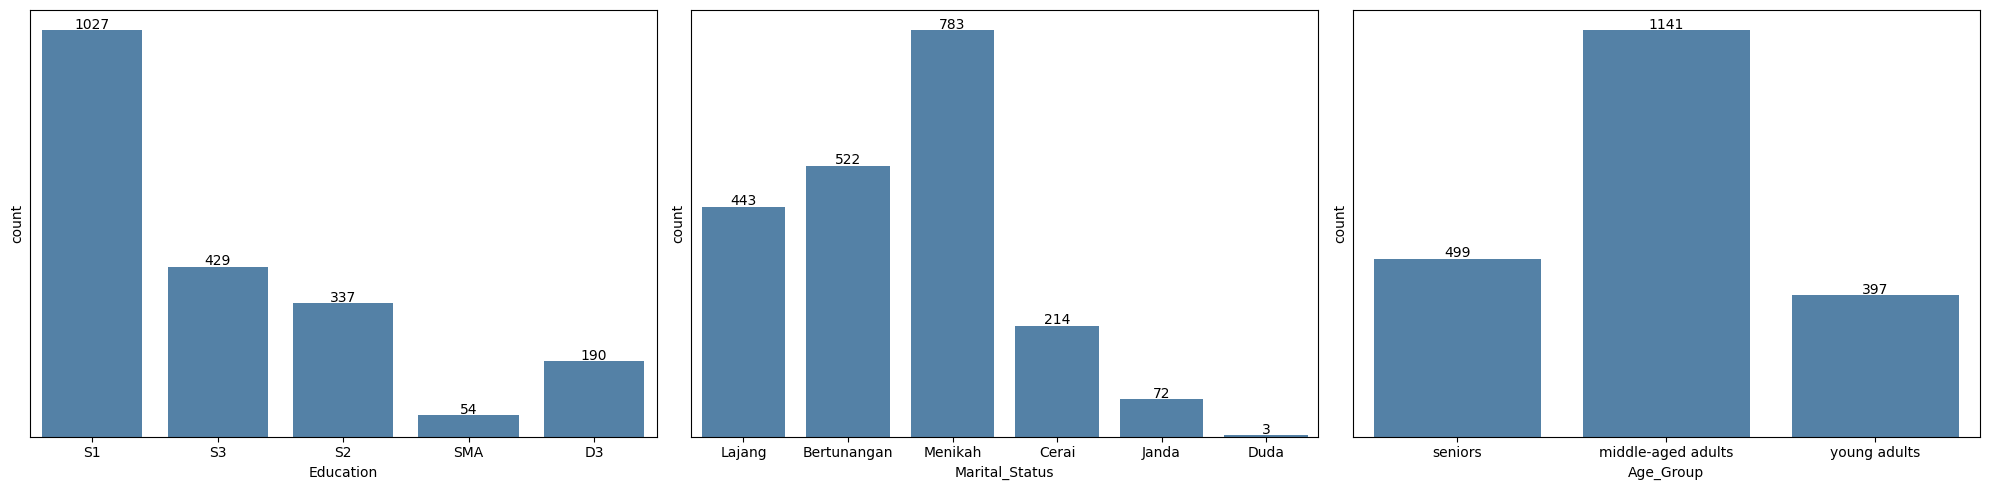

In [47]:
plt.figure(figsize=(20, 5))
for i in range(0, len(categorical_feats)):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=df_clean[categorical_feats[i]], color='steelblue')

    for a in ax.patches:
        txt = np.round(a.get_height())
        anot = txt.astype('int64')
        ax.annotate(anot, (a.get_x()+a.get_width()/2, a.get_height()),
                    ha='center', va='top', xytext=(0, 9), textcoords='offset points')
    plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
    plt.tight_layout()

**Key Takeaways** :

- Data menunjukkan variasi dalam `Education` ,  `Marital_Status`, dan `Age_Group` responden tanpa nilai yang secara signifikan sangat dominan.
- Data menunjukkan bahwa mayoritas responden memiliki `Education` S1, `Marital_Status` "Menikah", dan termasuk dalam `Age_Group` dewasa paruh baya.

## Bivariate Analysis

---



### Conversion Rate Analysis Based on Income, Spending and Age

Pada tahap ini akan dilakukan analisis mengenai hubungan Conversion Rate dengan income, total spending, dan usia pelanggan.



In [48]:
variable = ['Income', 'Total_Spending', 'Age']

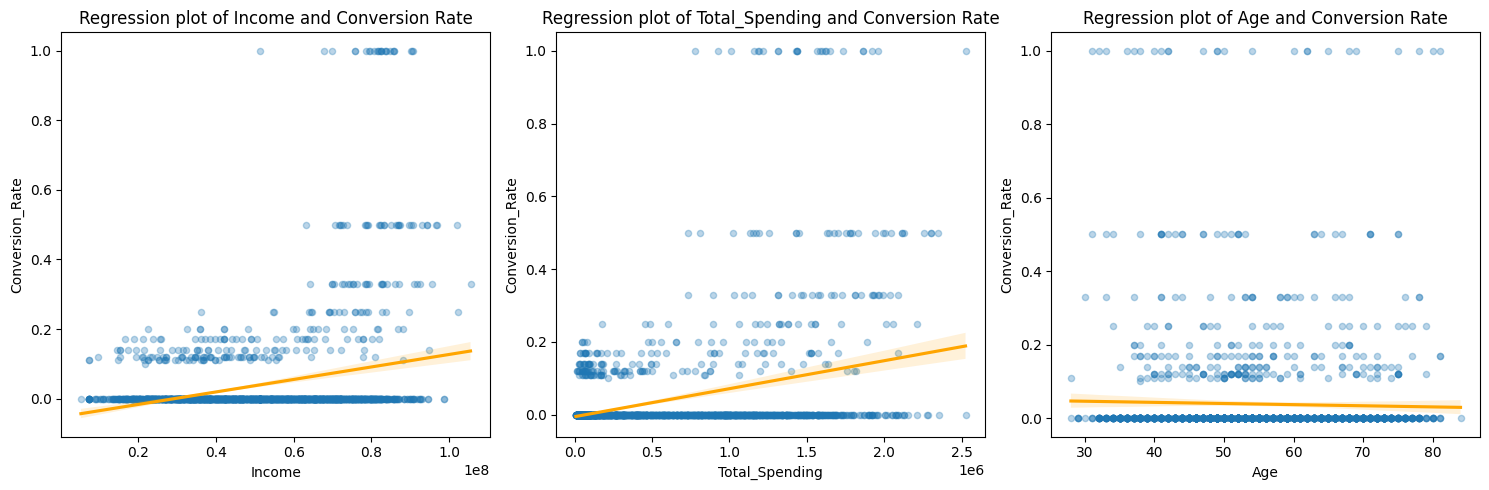

In [49]:
plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df_clean[variable[var]], y='Conversion_Rate', data=df_clean, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

**Key Takeaways** :

- Fitur `Income` dan `Total Spending` menunjukkan korelasi positif yang signifikan dengan `Conversion Rate`, menandakan bahwa pelanggan dengan pendapatan dan pengeluaran yang lebih tinggi cenderung memiliki tingkat konversi yang lebih tinggi.
- Sebaliknya, tidak ada korelasi yang signifikan antara fitur `Age` dengan `Conversion Rate`, menunjukkan bahwa usia tidak memengaruhi tingkat konversi pelanggan secara signifikan.

## Multivariate Analysis

---



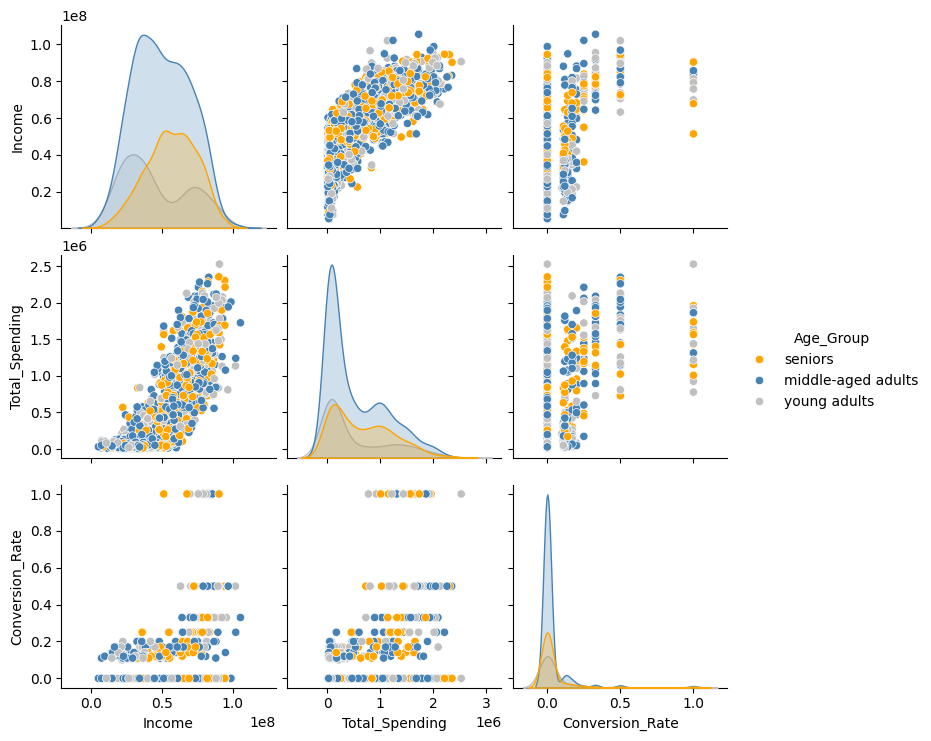

In [50]:
sns.pairplot(df_clean[['Income', 'Total_Spending', 'Age_Group', 'Conversion_Rate']], hue = 'Age_Group', palette=['orange', 'steelblue','silver'])

**Key Takeaways** :

- Dalam analisis pairplot, tidak terlihat pola atau kelompok usia yang jelas untuk fitur Pendapatan, Pengeluaran Total, dan Tingkat Konversi.
- Distribusi usia cenderung merata tanpa kelompok usia yang menonjol secara signifikan.Hal ini menunjukkan bahwa usia mungkin tidak menjadi faktor dominan yang mempengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi.
- Meskipun usia tetap menjadi faktor penting dalam analisis pemasaran, faktor lain seperti pendapatan dan pola pengeluaran mungkin memiliki pengaruh yang lebih besar pada tingkat konversi.

# Feature Selection

In [51]:
df_select = df_clean.copy()

In [52]:
df_select.drop('ID', axis=1, inplace=True)

In [53]:
num_feature = df_select.select_dtypes(include=['int64', 'float64'])
num_feature.head(2)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,First_Purchase_Age,Total_Children,Membership_Duration,Total_Transaction,Total_Spending,Total_Accepted_Campaign,Conversion_Rate,Response
0,1957,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,67,55,0,12,25,1617000,0,0.14,1
1,1954,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,70,60,2,10,6,27000,0,0.00,0


In [54]:
cat_feature = df_select.select_dtypes(include=['object'])
cat_feature.head(2)

,Education,Marital_Status,Age_Group
0,S1,Lajang,seniors
1,S1,Lajang,seniors


## Correlation Matrix

---



Correlation Matrix akan menampilkan tabel koefisien korelasi antara beberapa variabel, membantu untuk memahami hubungan antar variabel dalam data.

In [55]:
df_select_corr = df_select.corr()['Response'][:-1]

# Select Feature dengan korelasi tinggi untuk di visualisasikan
best_feature = df_select_corr[abs(df_select_corr) >= 0.1].sort_values(ascending=False)

# Select Feature dengan korelasi rendah untuk di drop
drop_feature = df_select_corr[abs(df_select_corr) < 0.1].sort_values(ascending=False)

In [56]:
low_corr_feature = drop_feature.index.tolist()
low_corr_feature

['Year_Birth',
 'NumWebVisitsMonth',
 'NumStorePurchases',
 'NumDealsPurchases',
 'Age',
 'First_Purchase_Age',
 'Kidhome']

In [57]:
best_feature_df = df_select.loc[:, best_feature.index.tolist()].copy()
best_feature_df['Response'] = df_select['Response']

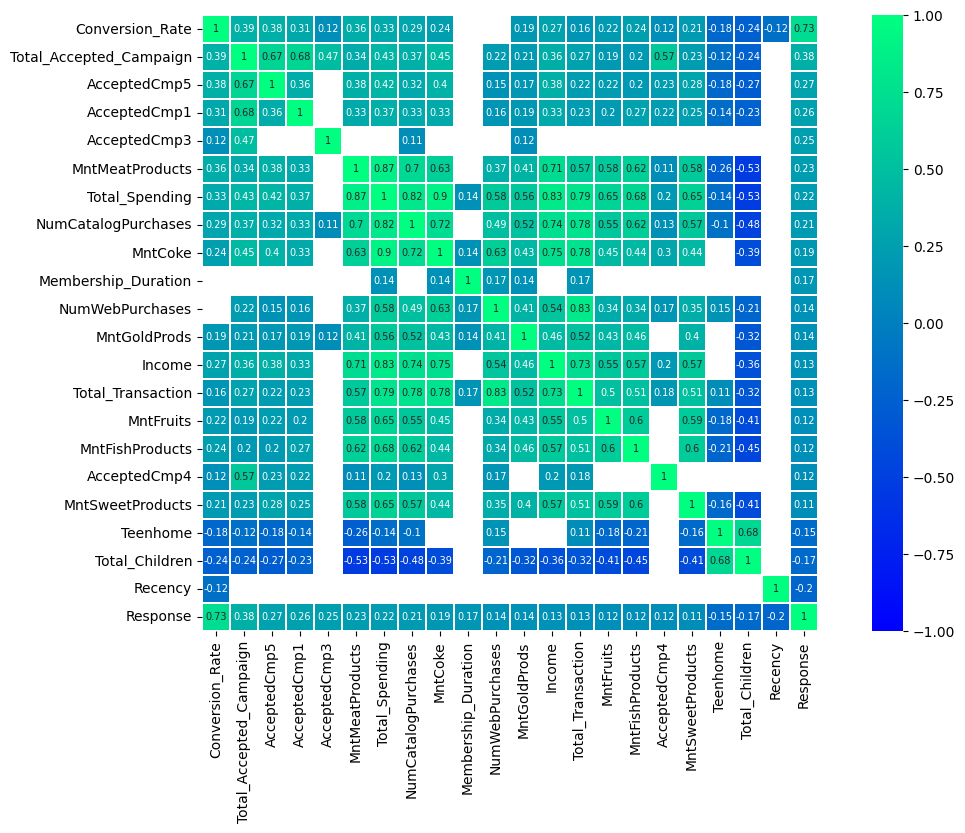

In [58]:
corr = best_feature_df.corr()
paper = plt.figure(figsize=(14,8))
sns.heatmap(corr[(corr>=0.1) | (corr<= -0.1)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True)

plt.show()

**Key Takeaways** :

1. Terdapat 7 Feature yang memiliki korelasi yang rendah yaitu di bawah 10% dengan response dan fitur-fitur ini akan di drop. Feature-feature tersebut adalah
- `Year_Birth`
- `NumWebVisitsMonth`
- `NumStorePurchases`
- `NumDealsPurchases`
- `Age`
- `First_Purchase_Age`
- `Kidhome`

2. Fitur-fitur yang dipertahankan adalah fitur yang memiliki korelasi di atas 10%

## Variance Inflation Factor (VIF)

---




Variabel Inflation Factor (VIF) adalah ukuran statistik yang digunakan untuk mengevaluasi seberapa kuat multicollinearity terdapat di antara variabel independen dalam model regresi. Multikolinieritas perlu dihapus sebelum analisis Principal Component Analysis (PCA) karena PCA bergantung pada asumsi independensi variabel.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [60]:
# Fungsi untuk menghitung VIF
def calculate_vif(df):
    X = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.set_index('Variable')

- VIF = 1: Tidak ada multikolinearitas antara variabel.
- 1 < VIF < 5: Multikolinearitas sedang, biasanya diterima, namun perlu diperhatikan jika mendekati 5.
- VIF >= 5: Multikolinearitas tinggi, dapat mengganggu hasil analisis prediksi.

In [61]:
def handle_multicollinearity(df, threshold=5):
    # Lakukan iterasi terus menerus hingga tidak ada fitur yang memiliki VIF di atas treshold
    while True:
        vif_data = calculate_vif(df)
        # Jangan hitung constant dalam perhitungan max vif
        max_vif = vif_data.drop('const')['VIF'].max()
        if max_vif > threshold:
            variable_to_drop = vif_data[vif_data["VIF"] == max_vif].index[0]
            print("Dropping variable:", variable_to_drop, "VIF:", max_vif)
            df = df.drop(variable_to_drop, axis=1)
        else:
            break
    return df

In [62]:
df_handled = handle_multicollinearity(best_feature_df)

Dropping variable: Total_Accepted_Campaign VIF: inf
Dropping variable: MntMeatProducts VIF: inf
Dropping variable: Total_Spending VIF: 22.93867818272349
Dropping variable: Total_Transaction VIF: 9.299648866821558


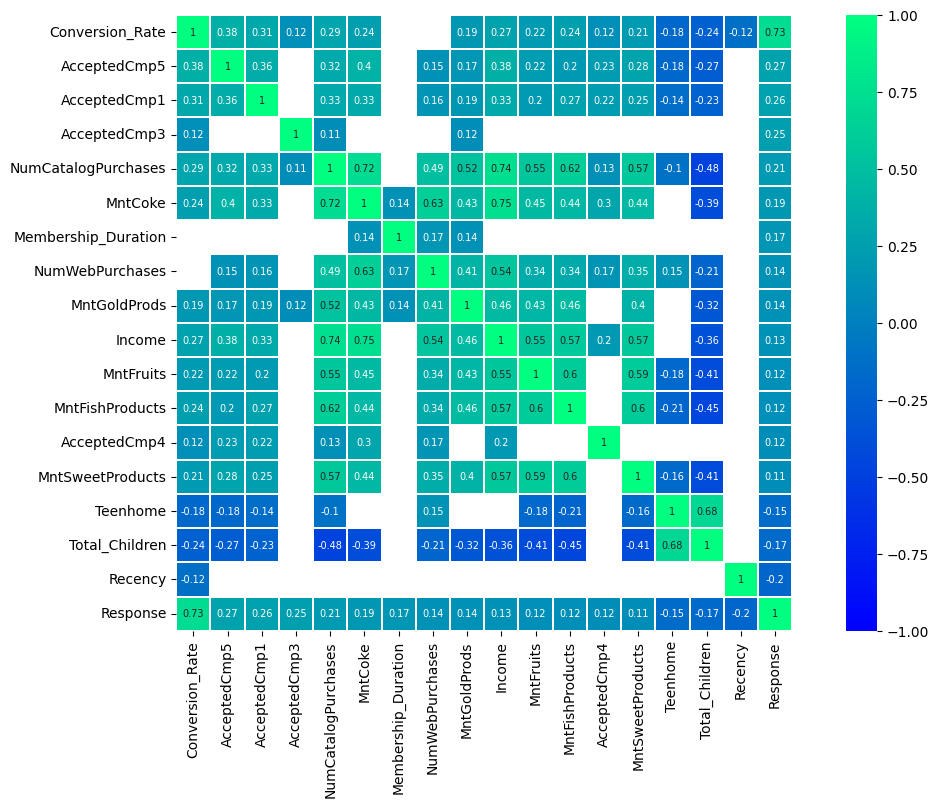

In [63]:
corr = df_handled.corr()
paper = plt.figure(figsize=(14,8))
sns.heatmap(corr[(corr>=0.1) | (corr<= -0.1)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True)

plt.show()

In [64]:
df_handled.head(3)

,Conversion_Rate,AcceptedCmp5,AcceptedCmp1,AcceptedCmp3,NumCatalogPurchases,MntCoke,Membership_Duration,NumWebPurchases,MntGoldProds,Income,MntFruits,MntFishProducts,AcceptedCmp4,MntSweetProducts,Teenhome,Total_Children,Recency,Response
0,0.14,0,0,0,10,635000,12,8,88000,58138000.0,88000,172000,0,88000,0,0,58,1
1,0.00,0,0,0,1,11000,10,1,6000,46344000.0,1000,2000,0,1000,1,2,38,0
2,0.00,0,0,0,2,426000,11,8,42000,71613000.0,49000,111000,0,21000,0,0,26,0


Feature numerik akhir hasil seleksi, tidak memiliki multikolinearitas dan memiliki korelasi terhadap target di atas 10%

**Key Takeaways** :

1. Terdapat 4 Feature yang memiliki VIF yang tinggi dan harus di drop yaitu
- `Total_Accepted_Campaign `
- `MntMeatProducts`
- `Total_Spending`
- `Total_Transaction`

# Data Preprocessing

In [65]:
df_prep = df_handled.copy()
# Gabungkan hasil seleksi fitur numerik dengan variabel kategorikal
df_prep = pd.concat([df_prep, cat_feature], axis=1)

# Buat target variable pada index terakhir
response = df_prep.pop('Response')
df_prep['Response'] = response
df_prep.head(3)

,Conversion_Rate,AcceptedCmp5,AcceptedCmp1,AcceptedCmp3,NumCatalogPurchases,MntCoke,Membership_Duration,NumWebPurchases,MntGoldProds,Income,MntFruits,MntFishProducts,AcceptedCmp4,MntSweetProducts,Teenhome,Total_Children,Recency,Education,Marital_Status,Age_Group,Response
0,0.14,0,0,0,10,635000,12,8,88000,58138000.0,88000,172000,0,88000,0,0,58,S1,Lajang,seniors,1
1,0.00,0,0,0,1,11000,10,1,6000,46344000.0,1000,2000,0,1000,1,2,38,S1,Lajang,seniors,0
2,0.00,0,0,0,2,426000,11,8,42000,71613000.0,49000,111000,0,21000,0,0,26,S1,Bertunangan,middle-aged adults,0


## Feature Encoding

---



Proses mengubah nilai-nilai dalam fitur kategorikal menjadi representasi numerik yang dapat dimengerti oleh model pembelajaran mesin.

### Education

- Tipe Kategorikal : Data Ordinal

- Metode Encoding: Label Encoding

  SMA=0, dan D3=1, S1=2, S2=3, S3=4.

In [66]:
education_mapping = {'SMA': 0, 'D3': 1, 'S1': 2, 'S2': 3, 'S3': 4}

In [67]:
# Lakukan label encoding untuk Education
df_prep['Education'] = df_prep['Education'].map(education_mapping)

### Marital Status

- Tipe Kategorikal : Data Nominal
- Metode Encoding: Binary Encoding

In [68]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [69]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols=['Marital_Status'])
df_prep = binary_encoder.fit_transform(df_prep)

### Age Group

- Tipe Kategorikal : Data Ordinal

- Metode Encoding: Label Encoding

  seniors=0, middle-aged adults=1, young adults=2.

In [70]:
age_group_mapping = {'seniors': 0, 'middle-aged adults': 1, 'young adults': 2}

In [71]:
df_prep['Age_Group'] = df_prep['Age_Group'].map(age_group_mapping)

## Feature Standardization

---



In [72]:
df_stand = df_prep.copy()

### Log Transform

In [73]:
results = []
for col in df_stand.columns.tolist():
    skewness = df_stand[col].skew()
    kurtosis = df_stand[col].kurt()

    # Determine skewness type
    if skewness > 0:
        skew_type = 'positive'
    elif skewness < 0:
        skew_type = 'negative'
    else:
        skew_type = 'no skew'
    results.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurtosis, 'Skew_Type': skew_type})

skew_df = pd.DataFrame(results)
skew_df = skew_df.reindex(skew_df['Skewness'].abs().sort_values(ascending=False).index)
skew_df

,Column,Skewness,Kurtosis,Skew_Type
0,Conversion_Rate,5.160214,30.387657,positive
2,AcceptedCmp1,3.866486,12.962443,positive
1,AcceptedCmp5,3.846383,12.807236,positive
12,AcceptedCmp4,3.730732,11.930071,positive
3,AcceptedCmp3,3.337862,9.150303,positive
22,Response,2.168911,2.706829,positive
13,MntSweetProducts,2.079526,3.870748,positive
10,MntFruits,2.072567,3.871094,positive
18,Marital_Status_0,2.054261,2.222170,positive
11,MntFishProducts,1.905274,2.971120,positive


In [74]:
skew_features = skew_df[abs(skew_df['Skewness']) >= 1.0]['Column'].tolist()
skew_features

['Conversion_Rate',
 'AcceptedCmp1',
 'AcceptedCmp5',
 'AcceptedCmp4',
 'AcceptedCmp3',
 'Response',
 'MntSweetProducts',
 'MntFruits',
 'Marital_Status_0',
 'MntFishProducts',
 'MntGoldProds',
 'NumCatalogPurchases',
 'MntCoke']

**Key Takeaways** :

- Terdapat beberapa feature yang memiliki skewness yang tinggi
- Dikarenakan feature yang menunjukkan skewness tinggi bukan merupakan jenis data numerik, melainkan numerik yang kategorikal, penggunaan log transform mungkin tidak relevan atau tidak bermanfaat untuk memengaruhi distribusi data.

### Scalling

Feature standardization dilakukan menggunakan standard scaller untuk mengubah skala data sedemikian rupa sehingga setiap fitur memiliki rata-rata nol dan varians satu

In [75]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standard scaling pada setiap fitur dalam DataFrame
df_stand = scaler.fit_transform(df_stand)

In [76]:
df_stand

array([[ 0.74768397, -0.24460889, -0.24347971, ...,  0.75454453,
        -1.43639143,  2.55821118],
       [-0.28358182, -0.24460889, -0.24347971, ...,  0.75454453,
        -1.43639143, -0.39089814],
       [-0.28358182, -0.24460889, -0.24347971, ..., -1.32530284,
         0.07571676, -0.39089814],
       ...,
       [-0.28358182, -0.24460889, -0.24347971, ..., -1.32530284,
         1.58782495, -0.39089814],
       [-0.28358182, -0.24460889, -0.24347971, ..., -1.32530284,
        -1.43639143, -0.39089814],
       [ 0.74768397, -0.24460889, -0.24347971, ...,  0.75454453,
        -1.43639143,  2.55821118]])

# Modeling

In [77]:
df_model = df_stand.copy()

## PCA

---



PCA dilakukan untuk mengurangi dimensi data dengan mempertahankan informasi yang signifikan.



### Cummulative Explained Variance Ratio

Cumulative Explained Variance Ratio adalah proporsi total varians dalam data yang dijelaskan oleh komponen-komponen utama yang dipertahankan, dihitung sebagai jumlah kumulatif dari proporsi varians yang dijelaskan oleh setiap komponen.

In [78]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=df_model.shape[1])
pca.fit(df_model)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [79]:
df_cumulative_variance = pd.DataFrame({
    'PC': range(1, len(cumulative_variance_ratio) + 1),
    'Cumulative Explained Variance Ratio': cumulative_variance_ratio
})

df_cumulative_variance

,PC,Cumulative Explained Variance Ratio
0,1,0.245218
1,2,0.337530
2,3,0.420457
3,4,0.487774
4,5,0.543236
5,6,0.590670
6,7,0.637831
7,8,0.681268
8,9,0.724423
9,10,0.762044


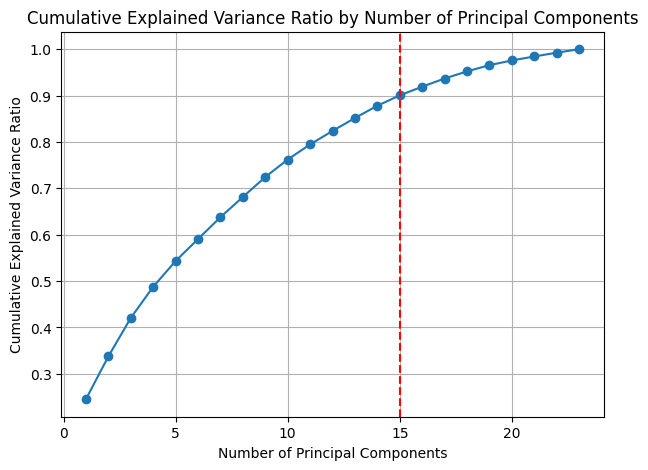

In [80]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.axvline(x=15, color='r', linestyle='--')  # Add vertical line at x = 9
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

In [81]:
# fit pca
pca = PCA(n_components = 15)
pca.fit(df_model)

# pca transformed
data_pca = pca.transform(df_model)

In [82]:
data_pca1 = pd.DataFrame(data_pca)

In [83]:
data_pca1_eval = data_pca1.copy()

**Key Takeaways** :

- PCA menunjukkan bahwa pada komponen utama ke-15 (PC = 15), lebih dari 90% varians dijelaskan. Oleh karena itu, PC yang dipilih adalah 15. Ini mengurangi dimensi fitur dari 35 menjadi hanya 15.

## Finding the Best Cluster

---



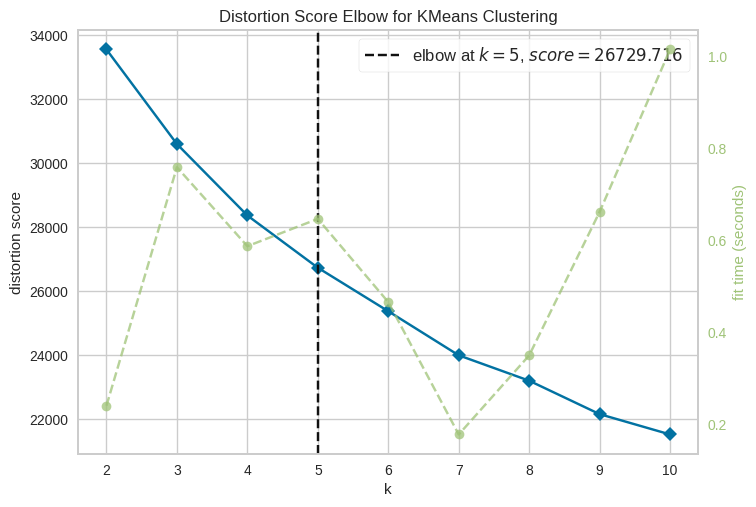

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
# visualisasi dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=73)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)

visualizer.fit(data_pca1)
visualizer.show()

**Key Takeaways** :

- Berdasarkan Distortion Score dan Elbow method didapatkan jumlah cluster terbaik adalah 5

## Clustering

---



In [85]:
# fit model
kmeans = KMeans(n_clusters=5, random_state = 73)
kmeans.fit(data_pca1.values)
data_pca1['cluster'] = kmeans.labels_

In [86]:
data_pca1.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
894,2.115726,-2.520729,0.429934,-2.564732,0.316330,0.641122,0.382130,0.203031,0.179915,-0.840319,1.034683,0.180977,0.020956,-0.006370,-1.789563,4
5,0.376838,-1.417555,-0.242344,0.579710,-0.509000,-0.617845,0.988409,-1.217602,-0.151426,-0.639605,0.792332,0.303799,-0.072414,0.448686,-0.589374,4
80,4.082230,0.775771,-2.049708,0.671979,1.378277,-1.044464,-0.006719,1.109938,0.206787,0.537457,0.775730,0.042555,3.136263,-0.507550,0.484863,0
187,7.221127,0.803652,2.539095,3.367119,2.195702,1.813385,2.369664,-0.114018,-0.324664,0.476576,0.154141,1.152267,-0.295318,1.652925,0.623666,2
1962,-0.861474,-0.455495,-0.331203,-0.252970,1.023236,-0.424900,-1.462839,1.192343,-0.072643,0.348874,0.417851,-0.443369,-0.020726,0.038476,-0.914517,3


In [87]:
color =  ['steelblue', 'indianred', 'grey', 'orange', 'olive']

Text(0.5, 1.0, 'Cluster Segementation')

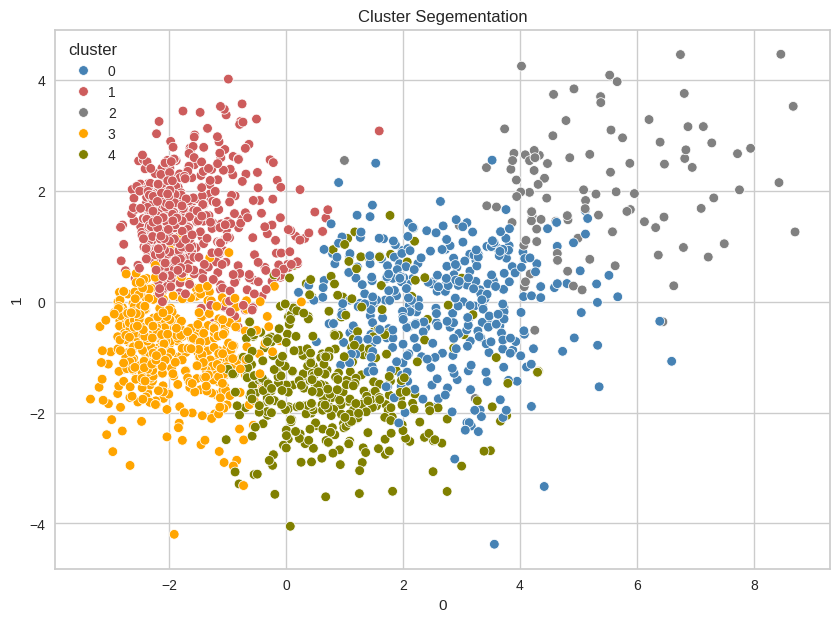

In [88]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette=color)
plt.title('Cluster Segementation')

**Key Takeaways** :

- Visualisasi Cluster dilakukan dengan PC 1 dan 2 yang mewakili varians terbanyak dari Principal Components pada PCA
- Dari hasil clustering, cluster 1 (Merah) dan 3 (Kuning), sudah terlihat cukup terpisah. Namun untuk cluster 0, 2, dan 4 masih belum terlihat terpisah secara baik, evaluasi lebih lanjut perlu dilakukan

# Evaluation

Visualisasi dari nilai silhouette score akan dibuat untuk rentang jumlah klaster tertentu dalam algoritma KMeans, Hal ini membantu evaluasi untuk menentukan jumlah klaster optimal berdasarkan seberapa baik data dipisahkan menjadi klaster yang berbeda.

In [89]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,8)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=73)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

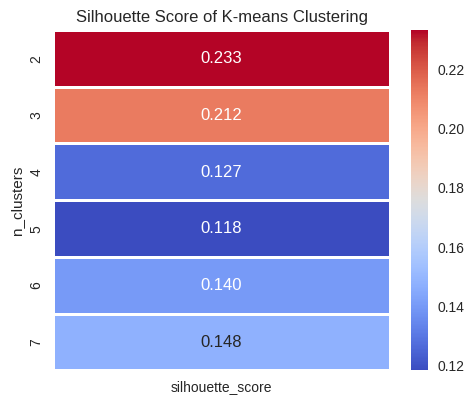

In [90]:
visualize_silhouette_layer(data_pca1_eval)

In [91]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=2, random_state = 73)
kmeans.fit(data_pca1_eval.values)
data_pca1['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Cluster Segementation')

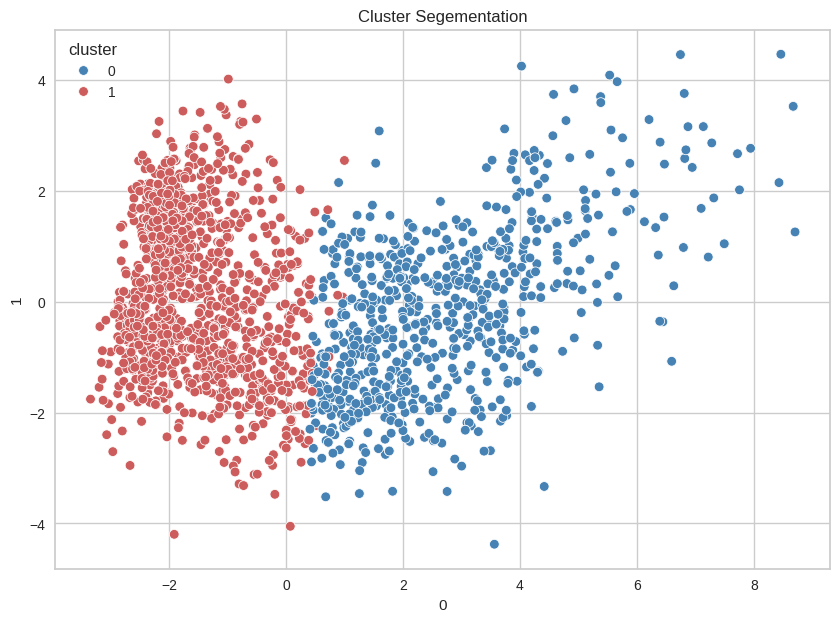

In [92]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette=color)
plt.title('Cluster Segementation')

**Key Takeaways** :

- Meskipun elbow method menunjukan cluster terbaik adalah 5, namun nilai silhoutte terbaik ada pada cluster = 2. Berdasarkan visualisasi 2 cluster juga terpisah dengan jelas. Maka dari itu, cluster yang akan dipilih adalah 2

# Clustering Personality Analysis

In [93]:
df_clean['Cluster'] = kmeans.labels_
df_clean.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Age_Group,First_Purchase_Age,Total_Children,Membership_Duration,Total_Transaction,Total_Spending,Total_Accepted_Campaign,Conversion_Rate,Response,Cluster
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,67,seniors,55,0,12,25,1617000,0,0.14,1,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,70,seniors,60,2,10,6,27000,0,0.00,0,1
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,59,middle-aged adults,48,0,11,21,776000,0,0.00,0,0


## Percentage

---



Visualisasi persentase masing-masing cluster akan dilakukan guna membantu dalam pemahaman distribusi data di setiap klaster.

In [94]:
# persentase total customer setiap cluster
cluster_count = df_clean['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_clean))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

,Cluster,count,percentage (%)
0,0,751,36.87
1,1,1286,63.13


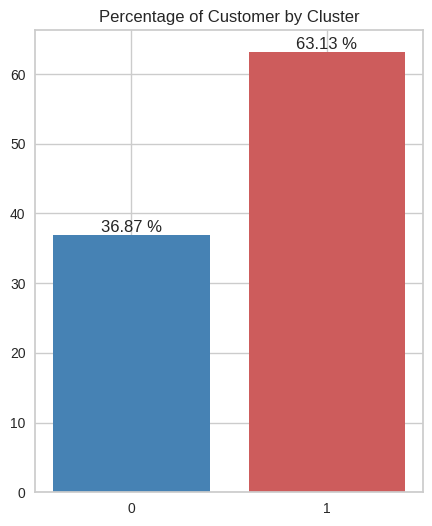

In [95]:
#visualisasi persentase customer pada setiap cluster
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,6))

bars = plt.bar(x=cluster_count['Cluster'], height= cluster_count['percentage (%)'], color=color)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height} %', ha='center',va='bottom')

plt.title('Percentage of Customer by Cluster')
plt.xticks(cluster_count['Cluster'])

plt.show()

**Key Takeaways** :

- Cluster 0 memiliki jumlah yang lebih sedikit yaitu 36.87% dibandingkan cluster 1 yang memiliki jumlah 63.13%

## Summary

In [96]:
feats = ['Recency','Total_Transaction','Total_Spending', 'Income', 'Conversion_Rate','Cluster', 'Age', 'Total_Children', 'NumWebVisitsMonth', 'Total_Accepted_Campaign']
data_summary = df_clean[feats]

In [97]:
round(data_summary.groupby('Cluster').agg(['mean']),2).round()

,Recency,Total_Transaction,Total_Spending,Income,Conversion_Rate,Age,Total_Children,NumWebVisitsMonth,Total_Accepted_Campaign
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,
0,49.0,21.0,1220860.0,70926201.0,0.0,57.0,0.0,4.0,0.0
1,49.0,10.0,184922.0,39090226.0,0.0,54.0,1.0,6.0,0.0


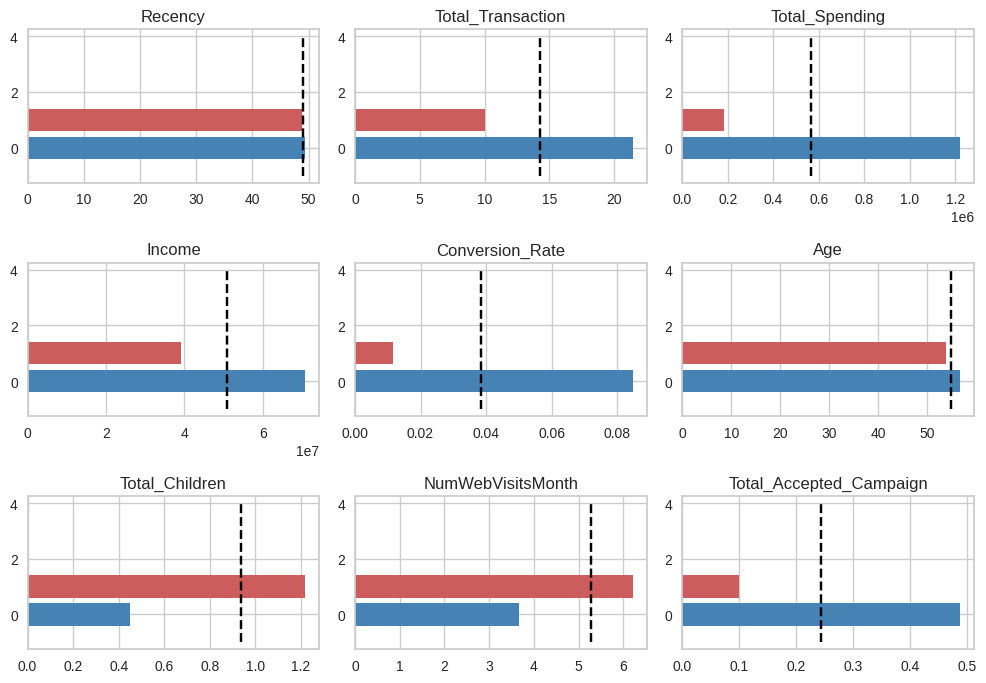

In [98]:
def dist_list(lst):
    plt.figure(figsize=[10, 7])
    i = 1
    for col in lst:
        if col != 'Cluster':
          ax = plt.subplot(3, 3, i)
          ax.vlines(df_clean[col].mean(), ymin=-1, ymax=4, color='black', linestyle='--')
          g = df_clean.groupby('Cluster')
          x = g[col].mean().index
          y = g[col].mean().values
          ax.barh(x, y, color=color)
          plt.title(col)
          i = i + 1

dist_list(feats)
plt.tight_layout()
plt.show()

## Univariate Analysis

---



In [101]:
variable = ['Income', 'Recency', 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'Conversion_Rate', 'Response']

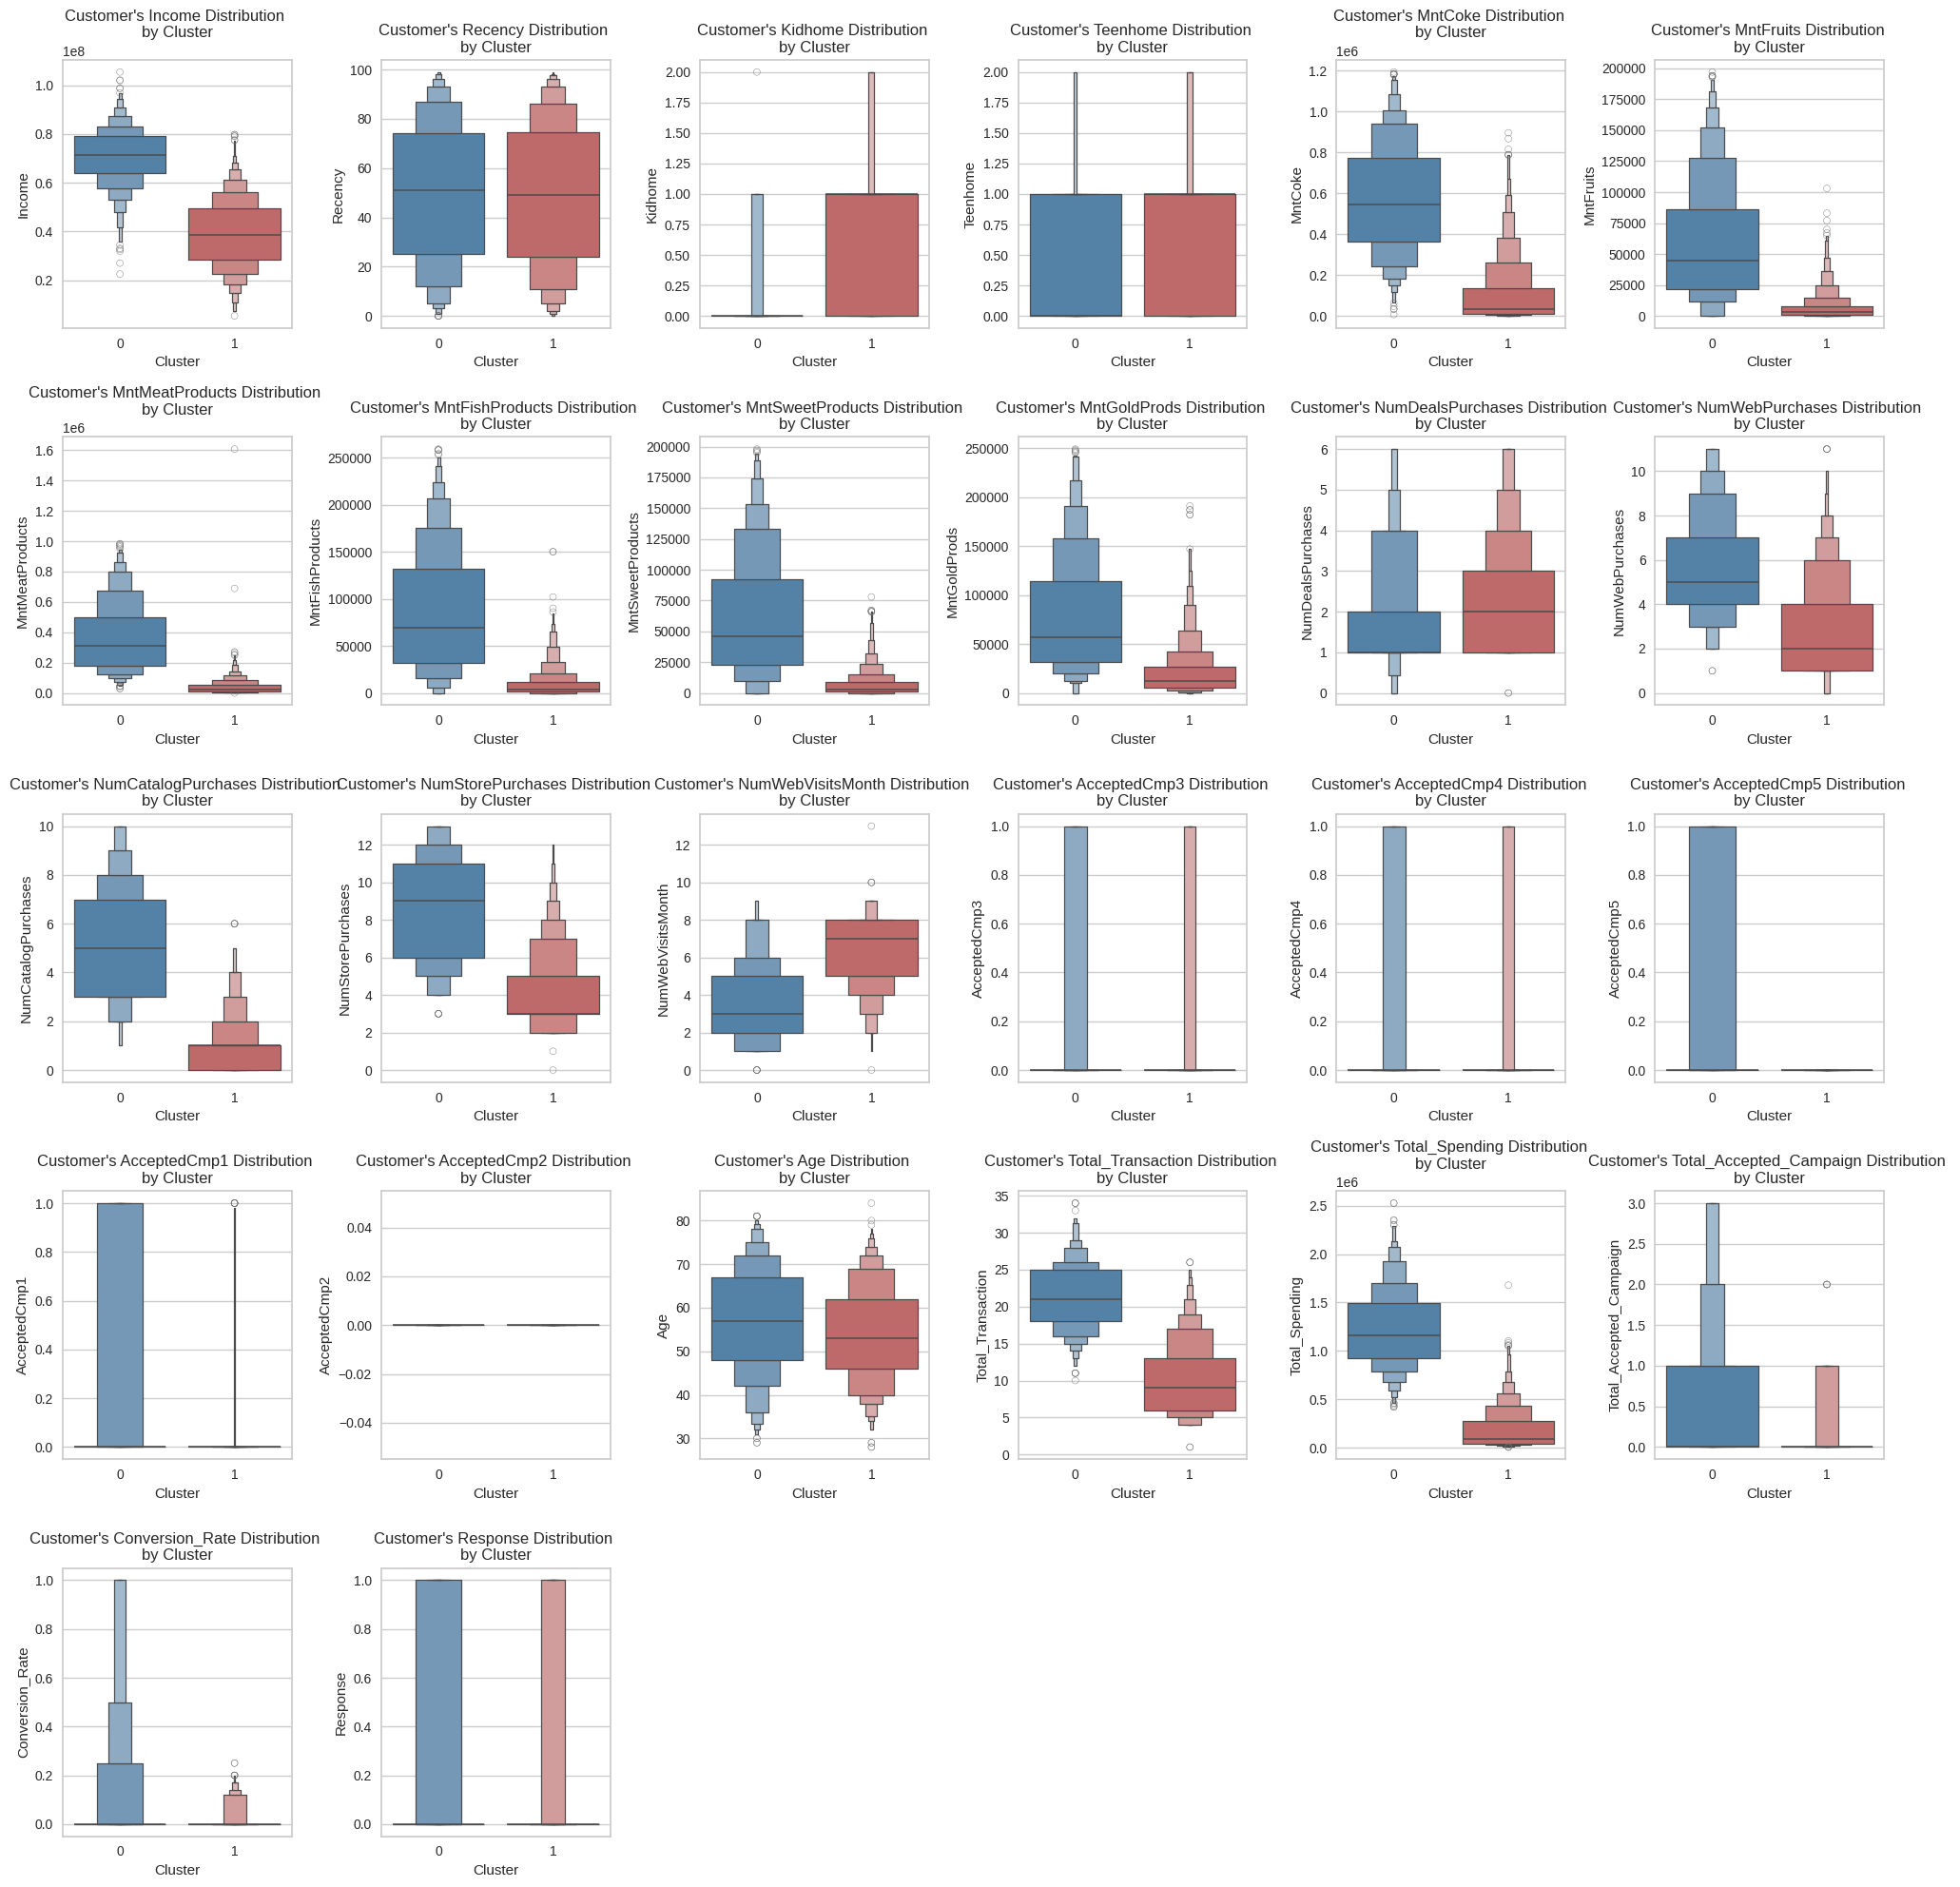

In [106]:
# distribusi cluster
plt.figure(figsize=(20, 20))
for i in range(0, len(variable)):
    plt.subplot(5, 6, i+1)
    sns.boxenplot(x='Cluster', y=df_clean[variable[i]], data=df_clean, palette=color).set(title=f'Customer\'s {variable[i]} Distribution \nby Cluster')
    plt.tight_layout()

**Key Takeaways** :

1.  **Cluster 0**: **Pelanggan Berkelas**

  Key Personality:
  - Loyal
  - Exclusive
  - Regular

  Deskripsi:
  Pelanggan dalam cluster ini cenderung merupakan individu yang mapan secara finansial, dengan usia rata-rata 57 tahun. Mereka memiliki pendapatan yang tinggi dan cenderung melakukan transaksi dengan nilai yang signifikan (rata-rata 21 transaksi dengan total pengeluaran rata-rata sebesar 1.220.860). Meskipun mereka tidak menerima kampanye secara keseluruhan, kemungkinan besar mereka adalah pelanggan setia yang telah lama berlangganan dan memiliki preferensi produk atau layanan tertentu.

2.  **Cluster 1**: **Pelanggan Berpotensi**

  Key Personality:
  - Exploratory
  - Potential
  - Online-centric

  Deskripsi:
  Pelanggan dalam cluster ini lebih muda dengan usia rata-rata 54 tahun dan cenderung memiliki pendapatan yang lebih rendah. Meskipun memiliki pendapatan yang lebih rendah, mereka memiliki tingkat kunjungan situs web yang lebih tinggi (rata-rata 6 kunjungan per bulan). Namun, mereka cenderung melakukan transaksi dengan nilai yang lebih rendah (rata-rata 10 transaksi dengan total pengeluaran rata-rata sebesar 184.922). Meskipun mereka tidak menerima kampanye secara keseluruhan, mereka memiliki potensi untuk lebih terlibat dalam program pemasaran jika disasar dengan strategi yang tepat.

# Business Recommendation for Marketing Retargeting

## Pelanggan Berkelas (Cluster 0)

---



- Fokus pada pelayanan dan pengalaman pelanggan yang eksklusif untuk mempertahankan loyalitas pelanggan yang sudah mapan.
- Gunakan strategi pemasaran yang menekankan kualitas, eksklusivitas, dan penghargaan kesetiaan untuk memperkuat hubungan dengan pelanggan.
- Pertimbangkan program insentif atau keanggotaan eksklusif untuk meningkatkan keterlibatan pelanggan yang sudah setia.

## Pelanggan Berpotensi (Cluster 1)

---



- Tingkatkan visibilitas merek secara online dan berikan pengalaman belanja yang menyenangkan dan mudah diakses.
- Gunakan strategi pemasaran yang menarik dan relevan untuk menarik perhatian pelanggan potensial dan mendorong konversi.
- Pertimbangkan untuk menawarkan diskon atau insentif khusus untuk mendorong transaksi dan meningkatkan keterlibatan pelanggan baru.